# Inactive Bike Daily Report

## Outline
- Setup
- Daily total of inactive trips
- Bike daily utilization time

## Setup

In [3]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.cloud import bigquery
from google.oauth2 import service_account

In [4]:
# create simple class to ingest bigquery data and plot them
class BigqueryDataPlot():
    '''
    When initiated, requires authenticated google.cloud.bigquery.Client instance as client argument to continue
    
    - load_data_from_bq(query) takes sql query as string to extract data from bq
    - plot_bq_data(x_col, y_col) takes the name of x- & y-axis column name from the data derived from load_data_from_bq
    '''

    def __init__(self,client):
        self.client = client
    
    def load_data_from_bq(self, query):
        self.df = self.client.query(query).result().to_dataframe()
    
    def plot_bq_data(self, x_col, y_col, title=None, y_label=None, x_label=None, figsize=(14,8)):
        plt.figure(figsize=figsize)
        sns.barplot(x=f"{x_col}", y=f"{y_col}", data=self.df)
        
        if title == None:
            pass
        else:
            plt.title(f"{title}")

        if x_label == None:
            pass
        else:
            plt.xlabel(f"{x_label}")
        
        if y_label == None:
            pass
        else:
            plt.ylabel(f"{y_label}")
            
        plt.show()

In [5]:
# instantiate BigqueryDataPlot using bigquery.Client
auth_path = r'C:\Users\jintp\Documents\Auth\bikeshare_analytics_bq.json'
scope = ['https://www.googleapis.com/auth/bigquery']
project = 'jintaepark-portfolio-project'
credentials = service_account.Credentials.from_service_account_file(auth_path, scopes=scope)
client = bigquery.Client(credentials=credentials, project=project)

bq_plot_1 = BigqueryDataPlot(client)

In [6]:
# Load bigquery data using custom query
query = '''
SELECT 
  FORMAT_DATE("%d (%a)", trip_begin_day) AS day,
  100 - AVG(location_uptime_perc) AS active_time_perc,
  SUM(trip_count_total) AS trip_count,
  SUM(trip_duration_second_total) AS trip_duration_second,
  SUM(trip_distance_meter_total) AS trip_distance_meter	
FROM `jintaepark-portfolio-project.bikeshare_analytics_prod.dim_bike_inactivity_stat_daily`
WHERE 
  trip_begin_day >= "2022-07-02" 
  AND trip_begin_day < "2022-07-16"
GROUP BY 1
ORDER BY 1
'''

bq_plot_1.load_data_from_bq(query)

## Daily Total of Inactive Trips

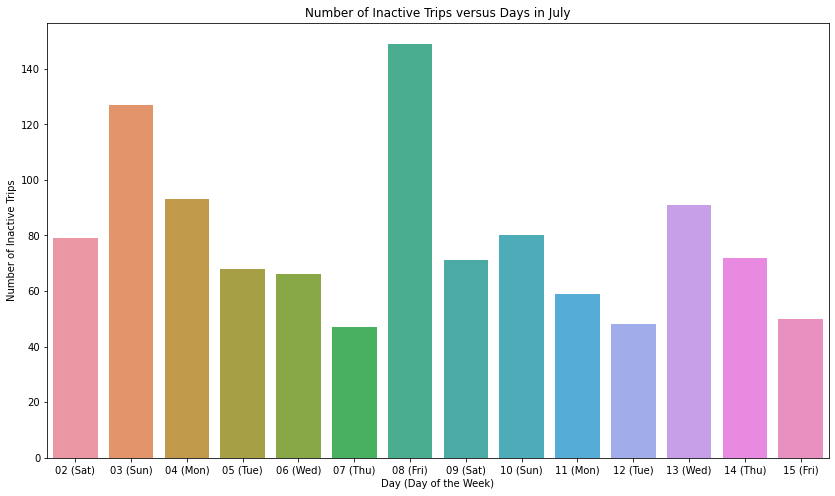

In [7]:
# Plot total number of indactive trips per day
bq_plot_1.plot_bq_data(
    x_col='day', \
    y_col = "trip_count", \
    title="Number of Inactive Trips versus Days in July", \
    x_label="Day (Day of the Week)",\
    y_label="Number of Inactive Trips"
    )

### Takeaway 
- According to the data, approximately 60-80 inactive bike "trips" occur daily
- Daily total value seem to fluctuate in a cyclical manner

## Bike daily utilization time

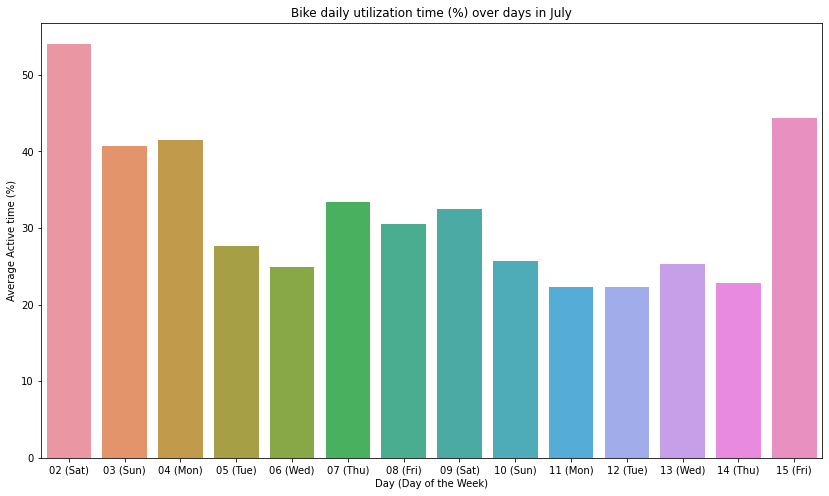

In [8]:
# Plot average active time in percentage per day
bq_plot_1.plot_bq_data(
    x_col='day', \
    y_col = "active_time_perc", \
    title="Bike daily utilization time (%) over days in July", \
    x_label="Day (Day of the Week)",\
    y_label="Average Active time (%)"
    )

### Takeaway 
- Active time in percentage (%) is calculated as 1 - (# of minutes bike location) / (1440 minutes in a day), which assumes that bike location is not pulled for active bike at the given moment
- Weekend leading upto & Fourth of July have higher % of bike activity at 40-50% utilization time
- Friday & weekends are observed to have higher bike utilization time than weekdays